## 🌊 Regresión lineal

#### Librerías y ajustes iniciales

In [1]:
import sys
sys.path.append("../../") # go to parent dir

In [2]:
from sklearn.linear_model import *
from sklearn.model_selection import GridSearchCV, cross_validate
from modelos import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
pd.options.display.max_columns = 50 # para mostrar todas las columnas

### 🔨 Construcción de modelos

In [4]:
# cargamos datos
X, y = datos_full()

#### Separación en train y test

In [5]:
# Para el modelo con todas las variables
X_train, X_test, y_train, y_test = sep_train_test()

#### Distribuciones de a variable respuesta en train y test

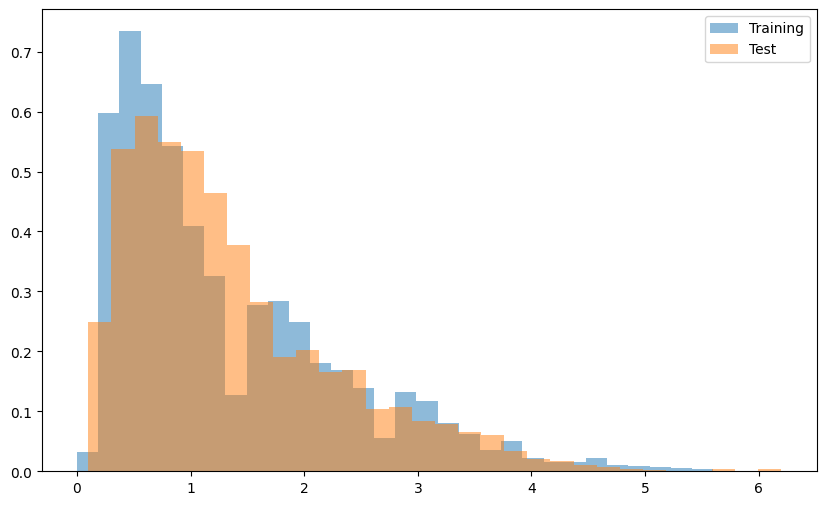

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(y_train, bins=30, alpha=0.5, label='Training', density=True)
ax.hist(y_test, bins=30, alpha=0.5, label='Test', density=True)
plt.legend()

Analizando las funciones de densidad de los dos conjuntos vemos que se parecen bastante, a excepción de las olas de altura alrededor de 0.5 metros, las cuáles parecen estar en mayor proporción en training que en el conjunto test.

### Modelos usando el conjunto de datos completo

In [7]:
params = {
    "random_state": [RANDOM_SEED],
    "alpha": [i/100 for i in range(1, 101, 2)],
    "max_iter": [100, 500, 1000, 2000, 5000],
}

#### Modelo lineal sin regularización

In [8]:
flo = MLFlow("lineal-sin-regularizar")

lr = LinearRegression()

cv_metrics = cross_validate(lr, X_train, y_train, cv=cv_folds(), scoring="neg_root_mean_squared_error", return_train_score=True)

lr.fit(X_train, y_train)

# metricas TEST
metricas = calcular_metricas(y_test, lr.predict(X_test))
# metricas CV
metricas["CV_TEST_RMSE"] = -1 * cv_metrics['test_score'].mean()
metricas["CV_TRAIN_RMSE"] = -1 * cv_metrics['train_score'].mean()

flo.persist_model_to_mlflow(X_train, lr, params, metricas,"lineal-sin-regularizar", "Modelo regresión lineal multivariable sin regularizar")

print(metricas)

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/types/utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


{'TEST_MAX_ERROR': 2.4730816980584507, 'TEST_ROOT_MEAN_SQ_ERROR': 0.4475179619726166, 'TEST_MEDIAN_ABS_ERROR': 0.2746365672251422, 'TEST_MEAN_ABS_ERROR': 0.34379586543548335, 'CV_TEST_RMSE': 0.47600330917623185, 'CV_TRAIN_RMSE': 0.4765748588598001}


#### Modelo RIDGE

In [8]:
flo = MLFlow("ridge-sin-regularizar")

rdgSearch = GridSearchCV(Ridge(), params, cv=cv_folds(), return_train_score=True, scoring="neg_root_mean_squared_error")
rdgSearch.fit(X_train, y_train)

flo.persist_model_to_mlflow(X_train, rdgSearch.best_estimator_, params, calcular_metricas_search(rdgSearch, X_test, y_test), "ridge-sin-regularizar", "Modelo ridge sin regularizar")

print(metricas)

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/types/utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


{'TEST_MAX_ERROR': 2.4730816980584507, 'TEST_ROOT_MEAN_SQ_ERROR': 0.4475179619726166, 'TEST_MEDIAN_ABS_ERROR': 0.2746365672251422, 'TEST_MEAN_ABS_ERROR': 0.34379586543548335, 'CV_TEST_RMSE': 0.47600330917623185, 'CV_TRAIN_RMSE': 0.4765748588598001}


/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


#### Modelo LASSO

In [9]:
flo = MLFlow("lasso-sin-regularizar")

lasSearch = GridSearchCV(Lasso(), params, cv=cv_folds(), return_train_score=True, scoring="neg_root_mean_squared_error")
lasSearch.fit(X_train, y_train)

flo.persist_model_to_mlflow(X_train, lasSearch.best_estimator_, params, calcular_metricas_search(lasSearch, X_test, y_test), "lasso-sin-regularizar", "Modelo lasso sin regularizar")

print(metricas)

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.202e+01, tolerance: 3.761e-01
  model = cd_fast.enet_coordinate_descent(
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.084e+01, tolerance: 3.791e-01
  model = cd_fast.enet_coordinate_descent(
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

{'TEST_MAX_ERROR': 2.4730816980584507, 'TEST_ROOT_MEAN_SQ_ERROR': 0.4475179619726166, 'TEST_MEDIAN_ABS_ERROR': 0.2746365672251422, 'TEST_MEAN_ABS_ERROR': 0.34379586543548335, 'CV_TEST_RMSE': 0.47600330917623185, 'CV_TRAIN_RMSE': 0.4765748588598001}


/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


#### Modelo ELASTIC NET

In [10]:
flo = MLFlow("elastic-sin-regularizar")

elSearch = GridSearchCV(ElasticNet(), params, cv=cv_folds(), return_train_score=True, scoring="neg_root_mean_squared_error")
elSearch.fit(X_train, y_train)

flo.persist_model_to_mlflow(X_train, elSearch.best_estimator_, params, calcular_metricas_search(elSearch, X_test, y_test), "elastic-sin-regularizar", "Modelo elastic sin regularizar")

print(metricas)

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.299e+02, tolerance: 3.761e-01
  model = cd_fast.enet_coordinate_descent(
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+02, tolerance: 3.791e-01
  model = cd_fast.enet_coordinate_descent(
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

{'TEST_MAX_ERROR': 2.4730816980584507, 'TEST_ROOT_MEAN_SQ_ERROR': 0.4475179619726166, 'TEST_MEDIAN_ABS_ERROR': 0.2746365672251422, 'TEST_MEAN_ABS_ERROR': 0.34379586543548335, 'CV_TEST_RMSE': 0.47600330917623185, 'CV_TRAIN_RMSE': 0.4765748588598001}


### Modelo usando selección de variables

#### Seleccion de variables

In [ ]:
cols = ['anio', 'mes', 'dia', 'moonphase', 'hora', 'temp', 'rh', 'pressure',
       'vis', 'uv_index', 'wdir_E', 'wdir_ENE', 'wdir_ESE', 'wdir_N',
       'wdir_NE', 'wdir_NNE', 'wdir_NNW', 'wdir_NW', 'wdir_S', 'wdir_SE',
       'wdir_SSE', 'wdir_SSW', 'wdir_SW', 'wdir_VAR', 'wdir_W', 'wdir_WNW',
       'wdir_WSW', 'Vviento', 'PeriodoOlas', 'Lluvia', 'Nubosidad']

X_train = X_train[cols]
X_test = X_test[cols]

In [ ]:
params = {
    "random_state": [RANDOM_STATE],
    "alpha": [i/100 for i in range(1, 101, 2)],
    "max_iter": [100, 500, 1000, 2000, 5000],
}

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
calcular_metricas(y_test, lr.predict(X_test))

In [ ]:
rdg = Ridge()
rdgSearch = GridSearchCV(rdg, params, cv=5)
rdgSearch.fit(X_train, y_train)

In [ ]:
rdgSearch.best_estimator_

In [ ]:
calcular_metricas(y_test, rdgSearch.best_estimator_.predict(X_test))

In [ ]:
las = Lasso()
lasSearch = GridSearchCV(las, params, cv=5)
lasSearch.fit(X_train, y_train)

In [ ]:
lasSearch.best_estimator_

In [ ]:
calcular_metricas(y_test, lasSearch.best_estimator_.predict(X_test))

In [ ]:
el = ElasticNet() # reemplazar alpha por l1_ratio...
elSearch = GridSearchCV(el, params, cv=5)
elSearch.fit(X_train, y_train)

In [ ]:
elSearch.best_estimator_

In [ ]:
calcular_metricas(y_test, elSearch.best_estimator_.predict(X_test))